In [2]:
from scipy import stats
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [251]:
# sample_1 = np.random.lognormal(0, 1, 1000)
# sample_1 = zip(np.random.normal(0, 1, 1000), np.random.normal(10, 1, 1000))
# sample_1 = map(lambda (x,y): x if np.random.random() < 0.2 else y, sample_1)
# sample_1 = np.random.standard_t(3, 1000) * 9 + 100
sample_1 = stats.t(df=3, loc=100, scale=9).rvs(10000)

print np.mean(sample_1)
print np.std(sample_1)
# sample_1 = np.random.normal(1, 1, 1000)
# sample_2 = np.random.normal(2, 1, 1000)

100.08228012648124
15.77765588033028


(array([1.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 6.000e+00, 1.200e+01,
        2.600e+01, 9.000e+01, 3.820e+02, 2.368e+03, 5.232e+03, 1.537e+03,
        2.340e+02, 7.400e+01, 1.800e+01, 9.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-54.73826677, -39.80210726, -24.86594775,  -9.92978824,
          5.00637127,  19.94253077,  34.87869028,  49.81484979,
         64.7510093 ,  79.68716881,  94.62332832, 109.55948782,
        124.49564733, 139.43180684, 154.36796635, 169.30412586,
        184.24028537, 199.17644488, 214.11260438, 229.04876389,
        243.9849234 , 258.92108291, 273.85724242, 288.79340193,
        303.72956143, 318.66572094, 333.60188045, 348.53803996,
        363.47419947, 378.41035898, 393.34651849]),
 <a list of 30 Patch objects>)

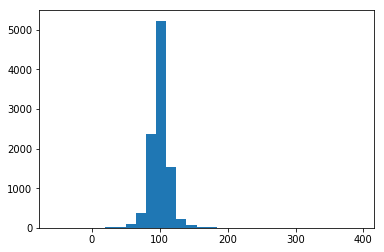

In [247]:
plt.hist(sample_1, bins = 30)

In [15]:
result = stats.ttest_ind(sample_1, sample_2)
result.pvalue

1.1748617226986226e-100

In [57]:
def sample_generator_norm(size, effect, params):
    sigma = params[0]
    sample_1 = np.random.normal(0, sigma, size)
    sample_2 = np.random.normal(effect, sigma, size)
    return sample_1, sample_2
    

In [94]:
def sample_generator_gamma(size, effect, params):
    k = params[0]
    theta = params[1]
    new_k = k
    new_theta = theta + effect / new_k
    sample_1 = np.random.gamma(k, theta, size)
    sample_2 = np.random.gamma(new_k, new_theta, size)
    return sample_1, sample_2
    

In [122]:
def sample_generator_lognormal(size, effect, params):
    mu = params[0]
    sigma = params[1]
    sample_1 = np.random.lognormal(mu, sigma, size)
    sample_2 = np.random.lognormal(mu + effect, sigma, size)
    return sample_1, sample_2

In [172]:
def sample_generator_skewed(size, effect, params):
    mu = params[0]
    sigma = params[1]
    sample_1 = zip(np.random.normal(0, sigma, size), np.random.normal(2*mu, sigma, size))
    sample_1 = map(lambda (x,y): x if np.random.random() < 0.5 else y, sample_1)
    sample_2 = zip(np.random.normal(0, sigma, size), np.random.normal(2*mu, sigma, size))
    sample_2 = map(lambda (x,y): x if np.random.random() < (0.5 - effect) else y, sample_2)
    return sample_1, sample_2

In [252]:
def sample_generator_student(size, effect, params):
    v = params[0]
    sample_1 = stats.t(df=v, loc=100, scale=9).rvs(size)
    sample_2 = stats.t(df=v, loc=100+effect, scale=9).rvs(size)
#     sample_1 = np.random.standard_t(v, size) * 2.6 + 100
#     sample_2 = np.random.standard_t(v, size) * 2.6 + 100 + effect
    return sample_1, sample_2

In [34]:
def exp_runner(n_repeats, size, effect, params, sample_generator):
    results = []
    for i in xrange(n_repeats):
        sample_1, sample_2 = sample_generator(size, effect, params)
        results.append(stats.ttest_ind(sample_1, sample_2).pvalue)
    return 1. * sum(map(lambda x: 1 if x<=0.05 else 0, results)) / len(results)

results = []
for i in xrange(1000):
    sample_1, sample_2 = sample_generator_norm(1000, 0.2, 1)
    results.append(stats.ttest_ind(sample_1, sample_2).pvalue)
    
1. * sum(map(lambda x: 1 if x<=0.05 else 0, results)) / len(results)
    

0.995

In [45]:
probs = []
effects = [2. * x / 1000 for x in xrange(100)]
for effect in effects:
    probs.append(exp_runner(10000, 1000, effect  , [1], sample_generator_norm))

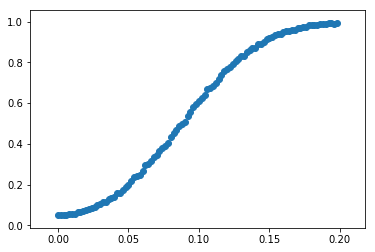

In [46]:
scatter(effects, probs)

In [253]:
probs_2 = []
effects_2 = [2. * x / 1000 for x in xrange(10)]
effects_2 = [0.0, 10.0]
for effect in effects_2:
    probs_2.append(exp_runner(10000, 36,
                              effect, [3], 
                              sample_generator_student))
#                               sample_generator_norm))

In [254]:
probs_2

[0.0461, 0.8118]